In [20]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



# Import Data

In [21]:
#delete unecessary columns
Data=pd.read_csv('Data.csv')
Data.drop(['ID','Unnamed: 0'],axis='columns', inplace=True )

In [22]:
Data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [23]:
#let's check the missing values
Data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [24]:
### let's look at the distribution of numerical values
Data.describe()


,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [25]:
#let's check if there is any abnormal values in  the categorical variables:
df_cat=Data[['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']]

for i in df_cat.columns:
    print(df_cat[i].unique())

['Male' 'Female']
['No' 'Yes' nan]
['No' 'Yes' nan]
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
['Low' 'Average' 'High']
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


In [26]:
#transform categorical labels to numerical labels
df_cat=Data[['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']]
encoders={}
for col_name in df_cat.columns:
    series = df_cat[col_name]
    label_encoder = LabelEncoder()
    df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

C:\Users\LAMYA\Anaconda3\envs\tensoflow200\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Handling Missing Values using Knn for both categorical and numerical labels 
#Numerical values
df_num=Data[['Age','Work_Experience','Family_Size']]
imputer = KNNImputer(n_neighbors=5)
df_num.loc[:]=imputer.fit_transform(df_num)
#categorical values
imputer = KNNImputer(n_neighbors=1)
df_cat.loc[:]=imputer.fit_transform(df_cat)
#concatenate the data
Data=pd.concat([df_cat,df_num], axis=1)

C:\Users\LAMYA\Anaconda3\envs\tensoflow200\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\LAMYA\Anaconda3\envs\tensoflow200\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [28]:
#Load Data
pca = PCA(2)
#Transform the data
d_f= pca.fit_transform(Data)
 
d_f.shape

(8068, 2)

In [29]:
#decode categorical data because k-prototype works with raw categorical data
for i in df_cat.columns:
     Data[i]=Data[i].astype(int)
for col_name in df_cat.columns:
    Data[col_name] = encoders[col_name].inverse_transform(Data[col_name])
    


In [30]:
Data.info()
#data ready to be implemented using K-protottype algorithm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Graduated        8068 non-null   object 
 3   Profession       8068 non-null   object 
 4   Spending_Score   8068 non-null   object 
 5   Var_1            8068 non-null   object 
 6   Age              8068 non-null   float64
 7   Work_Experience  8068 non-null   float64
 8   Family_Size      8068 non-null   float64
dtypes: float64(3), object(6)
memory usage: 567.4+ KB


In [31]:
# Get the position of categorical columns
catColumnsPos = [Data.columns.get_loc(col) for col in list(Data.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(Data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
Categorical columns position  : [0, 1, 2, 3, 4, 5]


In [32]:
# Convert dataframe to matrix
dfMatrix = Data.to_numpy()


# clustering 

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

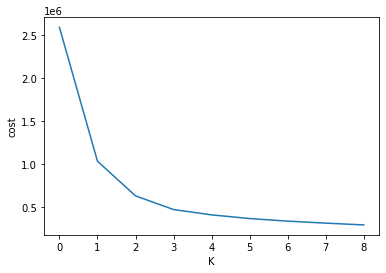

In [33]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show


In [34]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=cost, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


In [35]:
#let's build the Kprototype model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
Data['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


### let's visualize our clusters

In [36]:
#predict the labels of clusters.
label = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
print(label)

[2 1 0 ... 2 2 1]


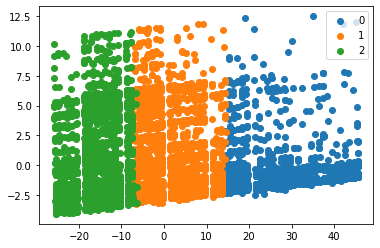

In [37]:
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1], label = i)
plt.legend()
plt.show()

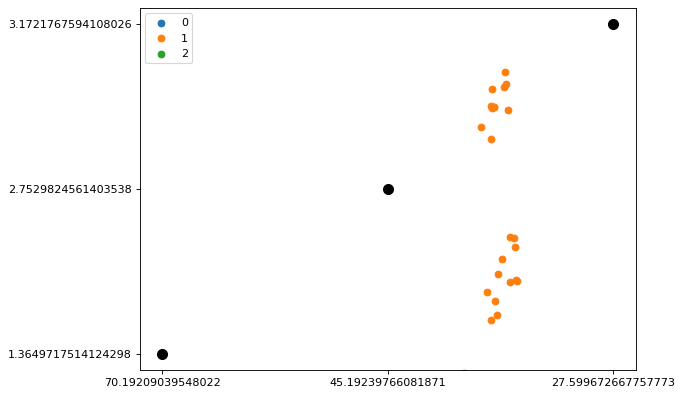

In [38]:
#Getting the Centroids of each cluster
from matplotlib.pyplot import figure

centroids = kprototype.cluster_centroids_
u_labels = np.unique(label)
figure(figsize=(8, 6), dpi=80)

#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Analysis

<AxesSubplot:>

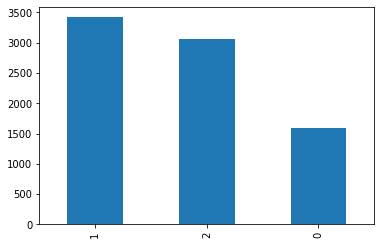

In [39]:
#the volume of each cluster
Data['clusters'].value_counts().plot(kind='bar')


In [40]:
#stats of numerical data by mean
Data.groupby(['clusters']).mean()

,Age,Work_Experience,Family_Size
clusters,,,
0,70.192090,1.364972,2.260515
1,45.192398,2.752982,2.692047
2,27.599673,3.172177,3.346907


In [41]:
#stats of categorical data by mode
Data.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']]


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
clusters,,,,,,
0,Male,Yes,Yes,Lawyer,Low,Cat_6
1,Male,Yes,Yes,Artist,Low,Cat_6
2,Male,No,No,Healthcare,Low,Cat_6
